<a href="https://colab.research.google.com/github/prog815/abscur_prediction/blob/master/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D1%83%D0%B5%D0%BC_%D0%BA%D1%83%D1%80%D1%81_%D0%BF%D0%BE%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2%D0%BE%D0%BC_%D0%9F%D1%80%D0%BE%D1%80%D0%BE%D0%BA%D0%B0_(Prophet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Прогнозируем курс посредством Пророка (Prophet)**

**Абсолютный курс**

Енин А.В.

г. Оренбург

2020 г.

Сайт - http://www.abscur.ru

Twitter - https://twitter.com/abscurs

ВКонтакте -  https://vk.com/abscur

Одноклассники -  https://ok.ru/group/53547043520717

FB -  https://www.facebook.com/abscur 

Telegram - https://t.me/AbsCur

GitHub - https://github.com/prog815/abscur_prediction

WhatsUp - https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber - https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Предсказываем будущее с помощью библиотеки Facebook Prophet: https://habr.com/ru/company/ods/blog/323730/

# Библиотеки

In [1]:
import datetime
print('[{}]'.format(datetime.date.today()))

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from fbprophet import Prophet

[2020-04-10]


# Импорт данных

Таблица с историей абсолютных курсов: https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/edit#gid=422799220

In [2]:
data_url = 'https://docs.google.com/spreadsheets/d/1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs/export?format=csv&id=1_-cdNCIC6NgyRDj0zLJBaohXo-K8qCfxfDLbYq2JLhs&gid=422799220'
abs_data = pd.read_csv(data_url,decimal=',',parse_dates=True,index_col=0)
abs_data.shape

(1315, 45)

In [3]:
# выбираем валюту
cur = np.random.choice(abs_data.columns)
cur

'isk'

In [4]:
# смотрим на данные
df = abs_data[cur]
df

дата
2016-09-03    0.139556
2016-09-04    0.139558
2016-09-05    0.138992
2016-09-06    0.139406
2016-09-07    0.139500
                ...   
2020-04-05    0.134176
2020-04-06    0.133625
2020-04-07    0.133467
2020-04-08    0.133213
2020-04-09    0.132738
Name: isk, Length: 1315, dtype: float64

# Рисуем курс

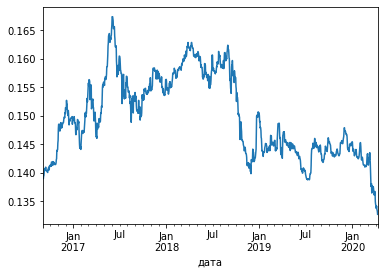

In [5]:
# рисуем
df.plot()

# Готовим данные для прогноза

In [0]:
predictions = 100

# приводим dataframe к нужному формату
df = df.reset_index()
df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние 30 точек, чтобы измерить на них качество
#train_df = df[:-predictions] 

train_df = df

# Учим модель

In [7]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

# Рисуем прогноз

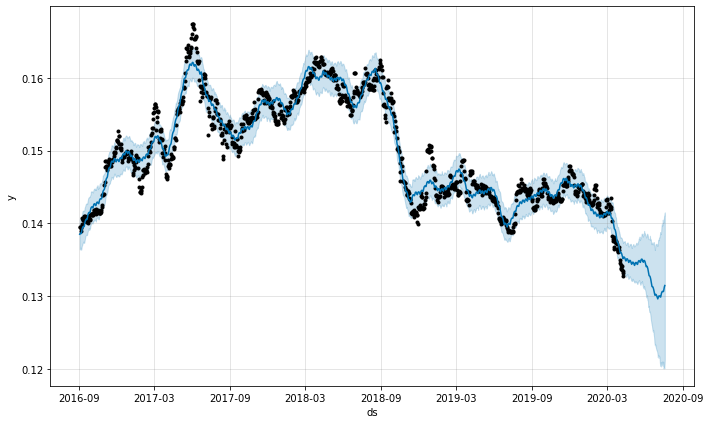

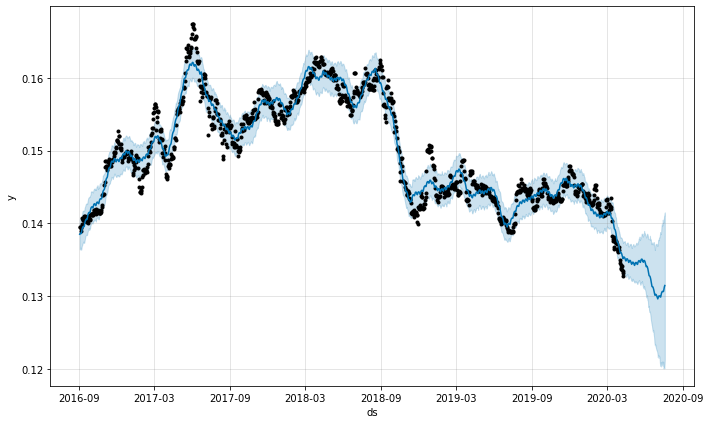

In [9]:
m.plot(forecast)

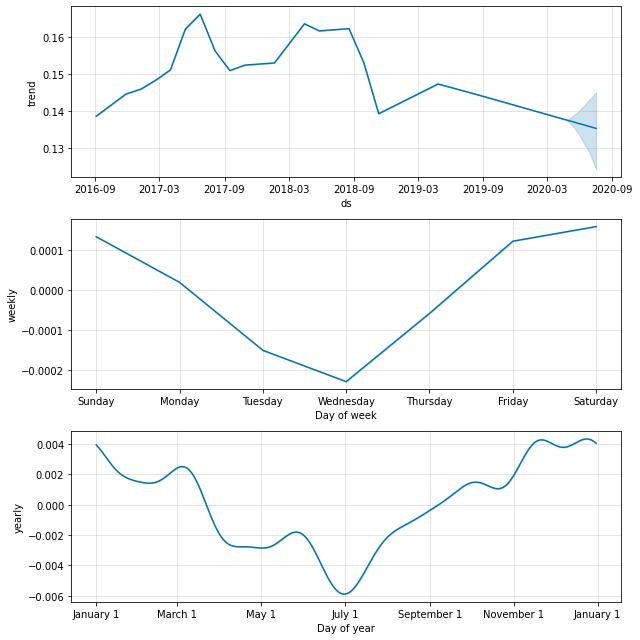

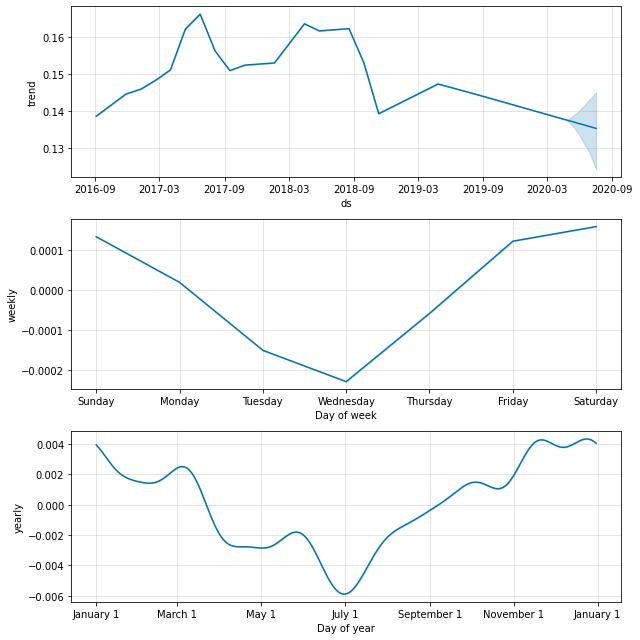

In [10]:
m.plot_components(forecast)

Коробочный метод для очень быстро дает результат. Качество под вопросом.